#Pre-Testing
###Removed the following rows from the dataset:
- in_apple_playlists
- in_apple_charts
- in_deezer_playlists
- in_deezer_charts
- in_shazam_charts
- in_spotify_charts
- in_spotify_playlists
- Valence_%
- acousticness_%
- Instrumentalness_%
- liveness_%
- speechiness_%
- Bpm
- Key
- Mode

###Ordered the rows by the number of streams in a descending order.


#Research Questions:
###**Research Question 1:** Do songs with high danceability receive a significantly higher number of streams compared to songs with low danceability?

###**Research Question 2:** Are more energetic songs associated with a statistically higher number of streams compared to less energetic songs?

###**Research Question 3:** Is there a strong regression relatinship between the variables dancebaility and energy? And what are the details of that relationship if there is any?


***Note:*** High danceability songs are the songs that have a score of 50% or more in the "danceability_%" column. Everything else would be considered low danceability songs. \
***Note:*** High energy songs are the songs that have a score of 50% or more in the "energy_%" column. Everything else would be considered low energy songs.

#Danceability

##Hypothesis:
####NULL (H0): Mean (High Danceability) group <= Mean (Low Danceability) group
####ALTERNATIVE (H1): Mean (High Danceability) group > Mean (Low Danceability) group

##Independent Samples T-test (Comparing Means of both groups)



Mean (High Danceability) = 500303801.3599034
Mean (Low Danceability) = 611441286.6178862
t-statistic: -2.032068408818643
p-value: 0.04242482816322972
alpha (significance level): 0.05


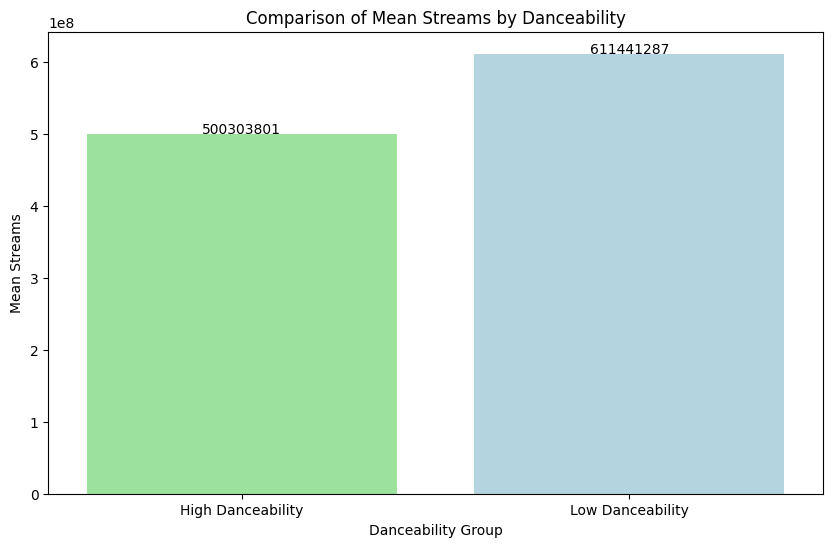

In [12]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

def load_csv_with_encoding(file_path, encodings):
    for encoding in encodings:
        try:
            data = pd.read_csv(file_path, encoding=encoding)
            return data
        except UnicodeDecodeError:
            pass
    return None

possible_encodings = ['utf-8', 'latin1', 'ISO-8859-1']

data = load_csv_with_encoding('spotify_2023.csv', encodings=possible_encodings)

if data is not None:
    group_high_danceability = data[data['danceability_%'] >= 50]['streams']
    group_low_danceability = data[data['danceability_%'] < 50]['streams']

    mean_high_danceability = group_high_danceability.mean()
    mean_low_danceability = group_low_danceability.mean()

    t_statistic, p_value = stats.ttest_ind(group_high_danceability, group_low_danceability)

    alpha = 0.05

    print(f"Mean (High Danceability) = {mean_high_danceability}")
    print(f"Mean (Low Danceability) = {mean_low_danceability}")
    print(f"t-statistic: {t_statistic}")
    print(f"p-value: {p_value}")
    print(f"alpha (significance level): {alpha}")

    plot_data = pd.DataFrame({
        'Danceability Group': ['High Danceability', 'Low Danceability'],
        'Mean Streams': [mean_high_danceability, mean_low_danceability]
    })

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Danceability Group', y='Mean Streams', data=plot_data, palette=['lightgreen', 'lightblue'])

    for index, value in enumerate(plot_data['Mean Streams']):
        plt.text(index, value, round(value), color='black', ha='center')

    plt.title('Comparison of Mean Streams by Danceability')
    plt.xlabel('Danceability Group')
    plt.ylabel('Mean Streams')

    plt.show()


##Conclusion
#### Mean(Low Danceability) > Mean(High Danceability)
#### Failed to Reject H0. There is no higher significance.
####Therefore: Lower Danceability percentage songs have higher number of streams by far which leads to a higher number on the list of Top Spotify 2023.

#Energy
##Hypothesis:
####NULL (H0): Mean (High Energy) group <= Mean (Low Energy) group
####ALTERNATIVE (H1): Mean (High Energy) group > Mean (Low Energy) group

##Independent Samples T-test (Comparing Means of both groups)

Mean (High Energy) = 513162986.04817706
Mean (Low Energy) = 521036352.431694
t-statistic: -0.1687486714183922
p-value: 0.8660302923617852
alpha (significance level): 0.05


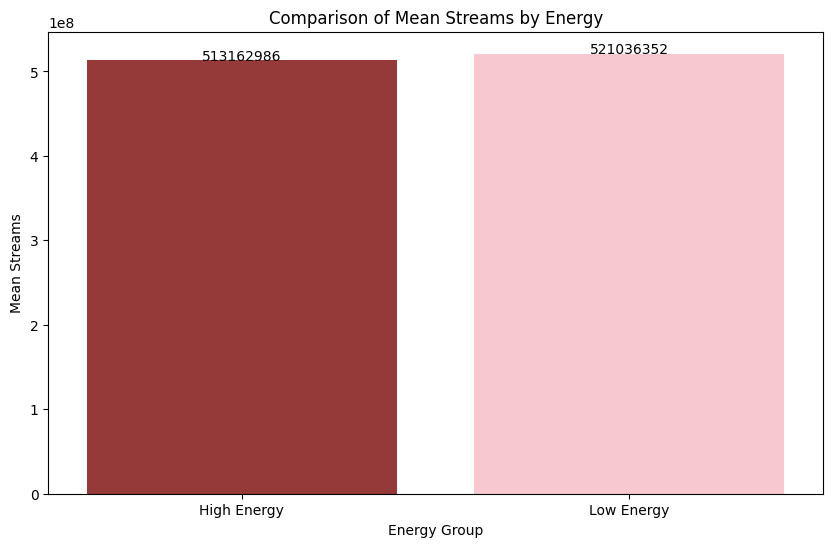

In [14]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

def load_csv_with_encoding(file_path, encodings):
    for encoding in encodings:
        try:
            data = pd.read_csv(file_path, encoding=encoding)
            return data
        except UnicodeDecodeError:
            pass
    return None

possible_encodings = ['utf-8', 'latin1', 'ISO-8859-1']

data = load_csv_with_encoding('spotify_2023.csv', encodings=possible_encodings)

if data is not None:
    group_high_energy = data[data['energy_%'] >= 50]['streams']
    group_low_energy = data[data['energy_%'] < 50]['streams']

    mean_high_energy = group_high_energy.mean()
    mean_low_energy = group_low_energy.mean()

    t_statistic, p_value = stats.ttest_ind(group_high_energy, group_low_energy)

    alpha = 0.05

    print(f"Mean (High Energy) = {mean_high_energy}")
    print(f"Mean (Low Energy) = {mean_low_energy}")
    print(f"t-statistic: {t_statistic}")
    print(f"p-value: {p_value}")
    print(f"alpha (significance level): {alpha}")

    plot_data = pd.DataFrame({
        'Energy Group': ['High Energy', 'Low Energy'],
        'Mean Streams': [mean_high_energy, mean_low_energy]
    })

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Energy Group', y='Mean Streams', data=plot_data, palette=['brown', 'pink'])

    for index, value in enumerate(plot_data['Mean Streams']):
        plt.text(index, value, round(value), color='black', ha='center')

    plt.title('Comparison of Mean Streams by Energy')
    plt.xlabel('Energy Group')
    plt.ylabel('Mean Streams')

    plt.show()


##Conclusion
#### Mean(Low Energy) > Mean(High Energy)
#### Failed to Reject H0. There is no higher significance.
####Therefore: Lower Danceability percentage songs have higher number of streams only by a little which might lead to a higher number on the list of Top Spotify 2023.

#Danceability and Energy Relationship
##Hypothesis:
####NULL (H0): There is no strong regression relationship between danceability and energy.
####ALTERNATIVE (H1): There is a strong regression relationship between danceability and energy.

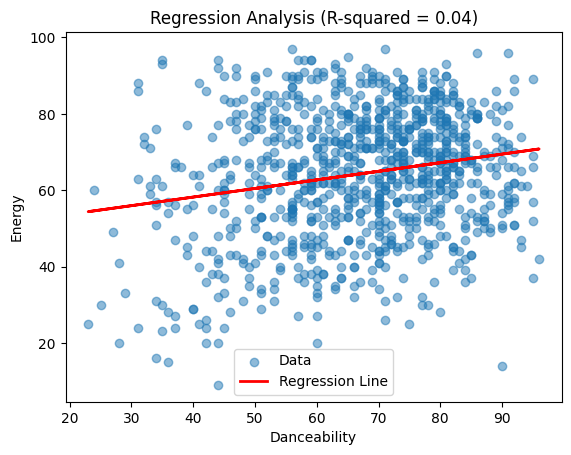

Slope (Coefficient): 0.22
Intercept: 49.20
R-squared: 0.04


In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def load_csv_with_possible_encodings(file_path, encodings):
    for encoding in encodings:
        try:
            data = pd.read_csv(file_path, encoding=encoding)
            return data
        except UnicodeDecodeError:
            pass
    return None

# Specify a list of possible encodings to try
possible_encodings = ['utf-8', 'latin1', 'ISO-8859-1']

# Load the CSV data with proper encoding
data = load_csv_with_possible_encodings('spotify_2023.csv', encodings=possible_encodings)

if data is not None:
    # Extract the independent variable (danceability) and dependent variable (energy)
    X = data['danceability_%'].values.reshape(-1, 1)
    y = data['energy_%'].values

    # Initialize and fit a linear regression model
    regressor = LinearRegression()
    regressor.fit(X, y)

    # Get the regression coefficients
    slope = regressor.coef_[0]
    intercept = regressor.intercept_

    # Calculate the R-squared value
    r_squared = regressor.score(X, y)

    # Visualize the regression line
    plt.scatter(X, y, alpha=0.5, label='Data')
    plt.plot(X, regressor.predict(X), color='red', linewidth=2, label='Regression Line')
    plt.xlabel('Danceability')
    plt.ylabel('Energy')
    plt.title(f'Regression Analysis (R-squared = {r_squared:.2f})')
    plt.legend()
    plt.show()

    # Interpretation
print(f"Slope (Coefficient): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_squared:.2f}")

##Conclusion

###From the regression analysis, we observed:
- A **slope (coefficient) of 0.22**, which suggests that there is a positive relationship between danceability and energy. Specifically, it implies that for each 1% increase in danceability, the energy increases by 0.22%, on average.
- The **R-squared value of 0.039** indicates that approximately 3.9% of the variability in the 'Energy' variable is explained by its relationship with 'Danceability'. While this value is relatively low, it's non-zero, suggesting some level of association.

###Interpretation:
- While the slope is statistically significant, indicating a positive relationship, the low R-squared value implies that the relationship is not strong. A strong relationship would typically be indicated by a higher R-squared value, suggesting that a major portion of the variance in the dependent variable is explained by the independent variable.
- Given the low R-squared value, the data does not provide strong evidence against the null hypothesis. Therefore, we fail to reject the null hypothesis (H0) and conclude that there is no strong regression relationship between danceability and energy in this dataset.

####The analysis suggests a positive but not strong regression relationship between danceability and energy. Therefore, we fail to reject H0. While both variables are related, danceability alone does not strongly predict the energy of a song.
